# Dependencies and const

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

%matplotlib inline

# Load tests data

In [123]:
test_name = "Test0"

In [124]:
functions_numbers = list(range(1,3+1))

In [125]:
versions_names = ["classic", "marriage-max", "marriage-min", "marriage-mean"]

# Preprocessing functions

In [126]:
def load_covergence_data(tests_names, function_number, version_name):
    def load_histories_to_df(histories):
        dataframes = []
        for hist_id, history in enumerate(histories):
            history_T = np.array(history).T
            dataframes.append(pd.DataFrame(columns = [hist_id], 
                         index=history_T[0],
                         data=history_T[1]))
        df = pd.concat(dataframes, axis=1)
        #fill NaNs with value before
        df.fillna(method='ffill',inplace=True)
        return df
    histories = []
    for test_name in tests_names:
        file = "../{0}_benchmark_f{1}_{2}_histories.npy".format(
                            test_name, function_number, version_name)
        if not os.path.isfile(file):
            print("Nie znaleziono pliku: {0}".format(file))
            continue
        histories += np.load(file).tolist()
    df = load_histories_to_df(histories)
    return df

In [127]:
def print_covergence_graphs(tests_names,agg_function=np.mean, 
                            y_scale = 'log', x_scale = 'log'):
    for function_number in functions_numbers:
        plt.figure()
        ax = plt.axes()
        ax.ticklabel_format(style='plain')
        ax.set_yscale(y_scale)
        ax.set_xscale(x_scale)
        #if(x_scale=='log'):
        #    ax.set_xlim(left=1.0)
        plt.title("Testy dla F{0}".format(function_number))
        for version_name in versions_names:
            df = load_covergence_data(tests_names, function_number, 
                                                    version_name)
            agg = df.apply(agg_function,axis=1)
            agg.plot()
            #index = covergence_graph.index
            #vals = covergence_graph.values.T[0]
            #plt.plot(index, vals)
        plt.legend(versions_names)

In [128]:
def load_scores_data(tests_names, function_number, version_name):
    scores = []
    for test_name in tests_names:
        file = "../{0}_benchmark_f{1}_{2}_scores.npy".format(
                            test_name, function_number, version_name)
        if not os.path.isfile(file):
            print("Nie znaleziono pliku: {0}".format(file))
            continue
        scores += np.load(file).tolist()
    return scores

In [129]:
def print_comp_tables(tests_names, agg_function=np.mean):
    data = []
    for function_number in functions_numbers:
        row = []
        for version_name in versions_names:
            agg = agg_function(load_scores_data(tests_names, function_number, version_name))
            row.append(agg)
        data.append(row)
    df = pd.DataFrame(index=functions_numbers, columns=versions_names, data=data)
    return df

In [144]:
def print_boxplots(tests_names, versions_to_drop = None):
    for function_number in functions_numbers:
        plt.figure()
        ax = plt.axes()
        plt.title("Testy dla F{0}".format(function_number))
        
        ver_to_scores = dict()
        for version_name in versions_names:
            ver_to_scores[version_name] = load_scores_data(tests_names, function_number, 
                                                    version_name)
        df = pd.DataFrame(ver_to_scores)
        if versions_to_drop:
            df = df.drop(versions_to_drop, axis=1)
        df.boxplot()

# Simple example

In [130]:
# Names examples for test_name=Test0:
#../Test0_benchmark_f1_classic_histories.npy
#../Test0_benchmark_f1_classic_scores.npy

In [131]:
scores = np.load("../Test0_benchmark_f1_classic_scores.npy")
print(scores.tolist(), scores.mean())

[0.006382288797354779, 0.006339852875532959, 0.00654278161956745] 0.006421641097485063


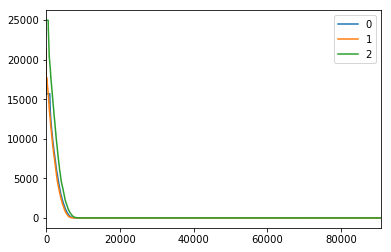

In [132]:
runs = load_covergence_data(["Test0"],2,"classic")

plt.figure(figsize=(15,5))
runs.plot()

In [133]:
runs = load_scores_data(["Test0"],2,"classic")

print(runs)

[0.02157542100435414, 0.0324441922316574, 0.01328380038674598]


# Results

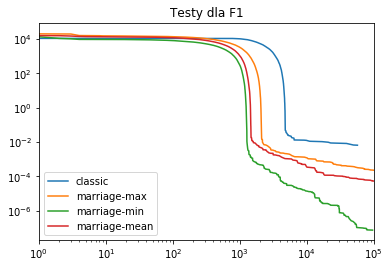

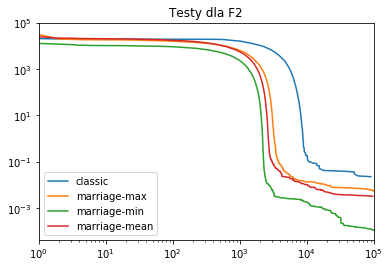

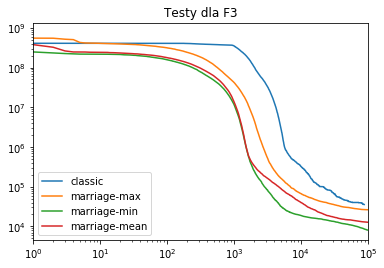

In [134]:
print_covergence_graphs(["Test0"], np.mean)

In [135]:
print_comp_tables(["Test0"], np.mean)

,classic,marriage-max,marriage-min,marriage-mean
1,0.006422,0.000225,7.320824e-08,0.000053
2,0.022434,0.005337,1.109434e-04,0.003213
3,35705.320193,26340.063870,8.087617e+03,12781.285836


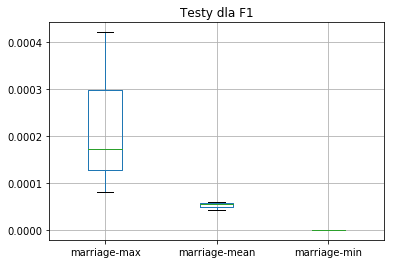

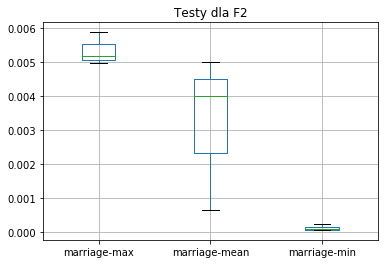

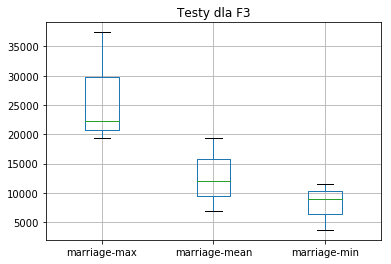

In [145]:
print_boxplots(["Test0"], versions_to_drop=["classic"])